In [1]:
import sys
sys.path.append('../galaxyZooNet/')

from utils import get_config_from_yaml
from resnet50_classifier import ResNet50_Classifier

In [2]:
config = get_config_from_yaml('../configs/resnet50_test.yaml')
#config.num_epochs = 50     # to test if early stopping is working fine
config.gpu_device = 1

In [3]:
classifier = ResNet50_Classifier(config=config)

------ Parameters ------
exp_name : test
cuda : True
ngpu : 1
gpu_device : 1
workers : 1
dir_image : /home/hhg/Research/galaxyClassify/catalog/galaxyZoo_kaggle/gz2_images/images
file_csv : /home/hhg/Research/galaxyClassify/catalog/galaxyZoo/zoo2/classAll_4label_small.csv
label_tag : label1
num_classes : 8
f_train : 0.64
f_valid : 0.16
f_test : 0.2
seed : 3
norm_mean : [0.485, 0.456, 0.406]
norm_std : [0.229, 0.224, 0.225]
input_size : 224
pretrained : True
num_epochs : 5
batch_size : 16
lr : 5e-05
step_size : 5
gamma : 0.1
early_stop_threshold : 10
dir_output : /home/hhg/Research/galaxyClassify/repo/galaxyZooNet/experiment

------ Prepare Data ------

Number of train galaxies: 640 (40 batches)
Number of valid galaxies: 160 (10 batches)
Number of test galaxies: 200 (13 batches)

------ Build Model ------

Number of trainable parameters
layer1 : 215808
layer2 : 1219584
layer3 : 14964736
layer4 : 7098368
fc     : 16392
TOTAL  : 23524424


In [4]:
classifier.train()


------ Create experiment directory ------

Training information will be stored at :
 	 /home/hhg/Research/galaxyClassify/repo/galaxyZooNet/experiment/test

------ Training ------

Epoch 1/5


/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1295.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


	train Loss: 1.6022 Acc: 0.4234 	valid Loss: 1.3092 Acc: 0.5062 	Time: 0m 9s
Epoch 2/5
	train Loss: 1.1981 Acc: 0.5531 	valid Loss: 1.2042 Acc: 0.5312 	Time: 0m 9s
Epoch 3/5
	train Loss: 1.0970 Acc: 0.5781 	valid Loss: 1.0395 Acc: 0.6188 	Time: 0m 9s
Epoch 4/5
	train Loss: 1.0237 Acc: 0.6219 	valid Loss: 1.1692 Acc: 0.5438 	Time: 0m 9s
Epoch 5/5
	train Loss: 0.9101 Acc: 0.6500 	valid Loss: 1.0916 Acc: 0.6000 	Time: 0m 9s
Best accuracy of 0.61875 reached at epoch 2.


In [5]:
test_loss, test_acc = classifier.test()

test Loss: 1.0753	 test Accuracy: 0.5850


## check training statistics

In [6]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [7]:
trainInfo = pickle.load(open(classifier.file_trainInfo, 'rb'))

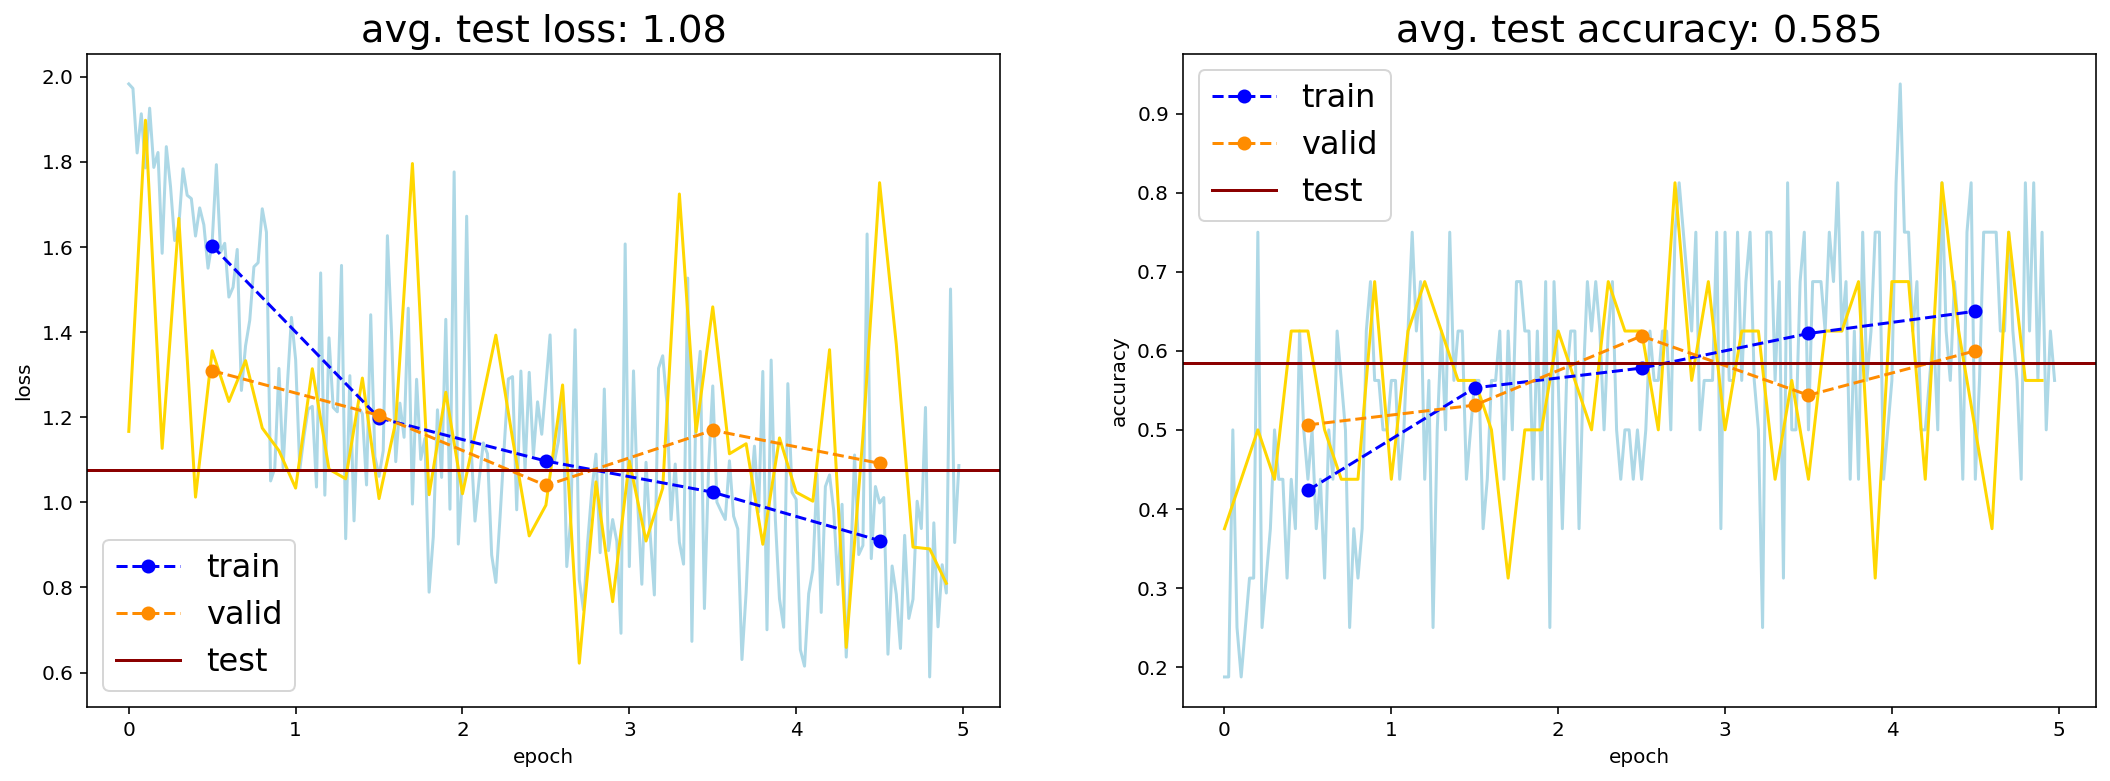

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
plt.rc('font', size=16)
#plt.rcParams['figure.dpi'] = 100

iter_tick = {}
for phase in ['train', 'valid']:
    iter_tick[phase] = np.array(range(len(trainInfo[f'{phase}_loss'])))/len(classifier.dataloader[phase])

epoch_tick = np.array(range(len(trainInfo['epoch_train_loss'])))+0.5
    
for i, key in enumerate(['loss', 'acc']):
    ax[i].plot(iter_tick['train'], trainInfo[f'train_{key}'], color='lightblue')
    ax[i].plot(iter_tick['valid'], trainInfo[f'valid_{key}'], color='gold')
    
    ax[i].plot(epoch_tick, trainInfo[f'epoch_train_{key}'], 'o--', label='train', color='b')
    ax[i].plot(epoch_tick, trainInfo[f'epoch_valid_{key}'], 'o--', label='valid', color='darkorange')

ax[0].axhline(test_loss, color='darkred', label='test')
ax[1].axhline(test_acc , color='darkred', label='test')

ax[0].set_title(f'avg. test loss: {test_loss:.3}')
ax[1].set_title(f'avg. test accuracy: {test_acc:.3}')

ax[0].set_ylabel('loss')
ax[1].set_ylabel('accuracy')
for i in range(2):
    ax[i].set_xlabel('epoch')
    ax[i].legend()

Text(0.5, 0, 'epoch')

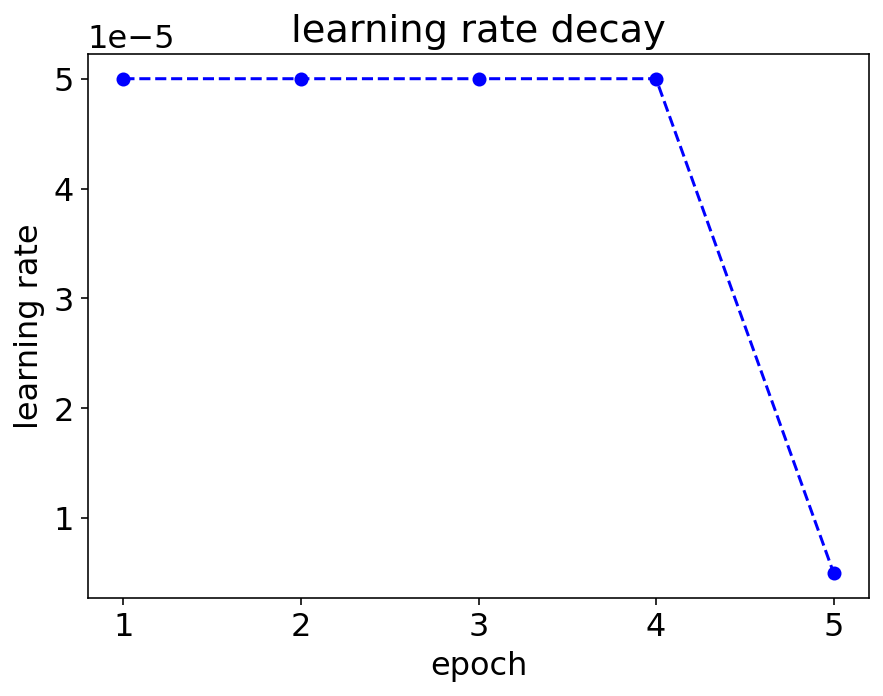

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
plt.rc('font', size=16)

epoch_tick = np.array(range(len(trainInfo['lr'])))+1
ax.plot(epoch_tick, trainInfo[f'lr'], 'o--', color='b')

ax.set_title('learning rate decay')
ax.set_ylabel('learning rate')
ax.set_xlabel('epoch')